In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
house_df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()


house_df.head(10)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,...,0,None,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,None,IR1,Lvl,AllPub,...,0,None,None,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,1,2008,WD,Normal,118000


In [2]:
house_df.shape

(1460, 81)

In [3]:
#target is saleprice

In [4]:
house_df.isnull().sum()

id                  0
mssubclass          0
mszoning            0
lotfrontage       259
lotarea             0
street              0
alley            1369
lotshape            0
landcontour         0
utilities           0
lotconfig           0
landslope           0
neighborhood        0
condition1          0
condition2          0
bldgtype            0
housestyle          0
overallqual         0
overallcond         0
yearbuilt           0
yearremodadd        0
roofstyle           0
roofmatl            0
exterior1st         0
exterior2nd         0
masvnrtype          8
masvnrarea          8
exterqual           0
extercond           0
foundation          0
                 ... 
bedroomabvgr        0
kitchenabvgr        0
kitchenqual         0
totrmsabvgrd        0
functional          0
fireplaces          0
fireplacequ       690
garagetype         81
garageyrblt        81
garagefinish       81
garagecars          0
garagearea          0
garagequal         81
garagecond         81
paveddrive

In [5]:
#data cleaning on continuous variables 

In [6]:
#will drop variables: poolqc, fence, miscfeature, alley, because they're almost all null 

In [7]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
id               1460 non-null int64
mssubclass       1460 non-null int64
mszoning         1460 non-null object
lotfrontage      1201 non-null float64
lotarea          1460 non-null int64
street           1460 non-null object
alley            91 non-null object
lotshape         1460 non-null object
landcontour      1460 non-null object
utilities        1460 non-null object
lotconfig        1460 non-null object
landslope        1460 non-null object
neighborhood     1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
bldgtype         1460 non-null object
housestyle       1460 non-null object
overallqual      1460 non-null int64
overallcond      1460 non-null int64
yearbuilt        1460 non-null int64
yearremodadd     1460 non-null int64
roofstyle        1460 non-null object
roofmatl         1460 non-null object
exterior1st      1460 non-n

In [8]:
#fill in missing values: Lotfrontage (float), bsmtcond and bsmtqual (object)
#fireplacequ (object), garagetype, garagecond, garagefinish, garagequal(object),
#garageyrblt (float)

In [9]:
#dropping variables poolqc, fence, miscfeature, alley
house_df.drop(['poolqc'],axis=1,inplace=True)
house_df.drop(['fence'], axis=1,inplace=True)
house_df.drop(['miscfeature'], axis=1,inplace=True)
house_df.drop(['alley'], axis=1,inplace=True)

# or house_df.drop(['poolqc','fence','miscfeature','alley'], axis=1,inplace=True)

In [10]:
house_df['lotfrontage']=house_df['lotfrontage'].fillna(house_df['lotfrontage'].mean())

In [11]:
house_df['bsmtcond']=house_df['bsmtcond'].fillna(house_df['bsmtcond'].mode()[0])
house_df['bsmtqual']=house_df['bsmtqual'].fillna(house_df['bsmtqual'].mode()[0])

In [12]:
house_df['fireplacequ']=house_df['fireplacequ'].fillna(house_df['fireplacequ'].mode()[0])

In [13]:
house_df['garagecond']=house_df['garagecond'].fillna(house_df['garagecond'].mode()[0])
house_df['garagequal']=house_df['garagequal'].fillna(house_df['garagequal'].mode()[0])
house_df['garagefinish']=house_df['garagefinish'].fillna(house_df['garagefinish'].mode()[0])
house_df['garagetype']=house_df['garagetype'].fillna(house_df['garagetype'].mode()[0])
house_df['garageyrblt']=house_df['garageyrblt'].fillna(house_df['garageyrblt'].mode()[0])


In [14]:
house_df.shape

(1460, 77)

In [15]:
house_df.isnull().sum()*100/house_df.isnull().count()

id               0.000000
mssubclass       0.000000
mszoning         0.000000
lotfrontage      0.000000
lotarea          0.000000
street           0.000000
lotshape         0.000000
landcontour      0.000000
utilities        0.000000
lotconfig        0.000000
landslope        0.000000
neighborhood     0.000000
condition1       0.000000
condition2       0.000000
bldgtype         0.000000
housestyle       0.000000
overallqual      0.000000
overallcond      0.000000
yearbuilt        0.000000
yearremodadd     0.000000
roofstyle        0.000000
roofmatl         0.000000
exterior1st      0.000000
exterior2nd      0.000000
masvnrtype       0.547945
masvnrarea       0.547945
exterqual        0.000000
extercond        0.000000
foundation       0.000000
bsmtqual         0.000000
                   ...   
bsmthalfbath     0.000000
fullbath         0.000000
halfbath         0.000000
bedroomabvgr     0.000000
kitchenabvgr     0.000000
kitchenqual      0.000000
totrmsabvgrd     0.000000
functional  

In [16]:
house_df['masvnrtype']=house_df['masvnrtype'].fillna(house_df['masvnrtype'].mode()[0])
house_df['masvnrarea']=house_df['masvnrarea'].fillna(house_df['masvnrarea'].mean())

In [17]:
house_df.isnull().sum()*100/house_df.isnull().count()

id               0.0
mssubclass       0.0
mszoning         0.0
lotfrontage      0.0
lotarea          0.0
street           0.0
lotshape         0.0
landcontour      0.0
utilities        0.0
lotconfig        0.0
landslope        0.0
neighborhood     0.0
condition1       0.0
condition2       0.0
bldgtype         0.0
housestyle       0.0
overallqual      0.0
overallcond      0.0
yearbuilt        0.0
yearremodadd     0.0
roofstyle        0.0
roofmatl         0.0
exterior1st      0.0
exterior2nd      0.0
masvnrtype       0.0
masvnrarea       0.0
exterqual        0.0
extercond        0.0
foundation       0.0
bsmtqual         0.0
                ... 
bsmthalfbath     0.0
fullbath         0.0
halfbath         0.0
bedroomabvgr     0.0
kitchenabvgr     0.0
kitchenqual      0.0
totrmsabvgrd     0.0
functional       0.0
fireplaces       0.0
fireplacequ      0.0
garagetype       0.0
garageyrblt      0.0
garagefinish     0.0
garagecars       0.0
garagearea       0.0
garagequal       0.0
garagecond   

In [18]:
house_df.columns

Index(['id', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street',
       'lotshape', 'landcontour', 'utilities', 'lotconfig', 'landslope',
       'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle',
       'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd', 'roofstyle',
       'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype', 'masvnrarea',
       'exterqual', 'extercond', 'foundation', 'bsmtqual', 'bsmtcond',
       'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1', 'bsmtfintype2',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating', 'heatingqc',
       'centralair', 'electrical', 'firstflrsf', 'secondflrsf', 'lowqualfinsf',
       'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath',
       'bedroomabvgr', 'kitchenabvgr', 'kitchenqual', 'totrmsabvgrd',
       'functional', 'fireplaces', 'fireplacequ', 'garagetype', 'garageyrblt',
       'garagefinish', 'garagecars', 'garagearea', 'garagequal', 'garagecond',
       'paveddrive', '

In [19]:
#working with categorical variables with one hot encoding 

In [20]:
catcolumns = ['mszoning', 'street', 'lotshape', 'landcontour', 'utilities', 'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle', 'saletype', 'salecondition', 'extercond', 'exterqual', 'foundation', 'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2', 'roofstyle', 'roofmat1', 'exterior1st', 'exterior2nd', 'masvnrtype', 'heating', 'heatingQC', 'centralair', 'electrical', 'kitchenqual', 'functional', 'fireplacequ', 'garagetype', 'garagefinish', 'garagecond', 'paveddrive'] 
    

In [21]:
pd.get_dummies(house_df["neighborhood"], drop_first=True)

,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,...,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
house_df = pd.concat([house_df, pd.get_dummies(house_df["neighborhood"])], axis=1)
house_df

#create one variable with all of the neighborhoods
#interpreting dummy coef: compare it to intercept(baseline)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,...,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
0,1,60,RL,65.000000,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0
1,2,20,RL,80.000000,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,0,0,0,1
2,3,60,RL,68.000000,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0
3,4,70,RL,60.000000,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,0,0,0,0,0
4,5,60,RL,84.000000,14260,Pave,IR1,Lvl,AllPub,FR2,...,1,0,0,0,0,0,0,0,0,0
5,6,50,RL,85.000000,14115,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0
6,7,20,RL,75.000000,10084,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,1,0,0,0
7,8,60,RL,70.049958,10382,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,0,0,0,0,0
8,9,50,RM,51.000000,6120,Pave,Reg,Lvl,AllPub,Inside,...,0,0,1,0,0,0,0,0,0,0
9,10,190,RL,50.000000,7420,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,0,0,0,0,0


In [23]:
house_df.corr()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
id,1.000000,0.011156,-0.009601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050199,-0.005024,...,0.034188,-0.067622,-0.024950,0.034681,-0.008031,-0.031818,0.014985,-0.019097,0.021925,-0.023069
mssubclass,0.011156,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,...,-0.013019,0.028908,0.063986,0.047766,-0.089009,0.006421,0.102288,0.082101,-0.067357,0.010139
lotfrontage,-0.009601,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,...,0.135648,0.125157,-0.092140,-0.061426,0.029869,0.011454,-0.055482,-0.035251,0.059107,-0.026029
lotarea,-0.033226,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,...,0.063068,0.008776,-0.067048,-0.031606,-0.001333,-0.012197,-0.067096,0.002052,0.215400,0.044440
overallqual,-0.028365,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,...,0.224693,0.368724,-0.148731,-0.062946,-0.179215,0.033059,0.224010,0.196736,0.125168,0.039575
overallcond,0.012609,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.127788,-0.046231,...,-0.054372,-0.122037,0.202733,0.040894,0.048910,-0.077996,-0.121549,-0.068266,-0.065212,0.054622
yearbuilt,-0.012713,0.027850,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.314745,0.249503,...,0.136082,0.268898,-0.464138,-0.201217,-0.058103,0.117528,0.279416,0.118962,0.116810,0.032020
yearremodadd,-0.021998,0.040581,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.179186,0.128451,...,0.097128,0.243558,-0.132494,-0.097119,-0.070968,0.050883,0.247736,0.089371,0.067139,0.020908
masvnrarea,-0.050199,0.022895,0.179283,0.103960,0.410238,-0.127788,0.314745,0.179186,1.000000,0.263582,...,0.297892,0.297003,-0.143595,-0.068446,-0.080191,-0.035277,0.069656,0.057821,0.050952,-0.034251
bsmtfinsf1,-0.005024,-0.069836,0.215828,0.214103,0.239666,-0.046231,0.249503,0.128451,0.263582,1.000000,...,0.143949,0.131004,-0.177889,-0.068065,0.032863,0.044973,-0.063893,0.109798,0.094962,0.071904


In [24]:
#split data

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
from sqlalchemy import create_engine

In [26]:
# Y is the target variable 
Y=house_df['saleprice']

#X is the feature set
X=house_df[['bedroomabvgr', 'fullbath', 'lotfrontage', 'overallqual', 'firstflrsf']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 1168
The number of observations in test set is 292


In [27]:
X_train.head()

,bedroomabvgr,fullbath,lotfrontage,overallqual,firstflrsf
151,3,1,120.000000,5,969
262,3,2,69.000000,8,1482
1037,3,2,70.049958,8,1055
1183,2,1,60.000000,5,1130
933,3,2,63.000000,7,1500


In [28]:
X_train = sm.add_constant(X_train)

In [29]:
# We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# We print the summary results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     571.1
Date:                Mon, 10 Feb 2020   Prob (F-statistic):          6.06e-310
Time:                        22:05:01   Log-Likelihood:                -14101.
No. Observations:                1168   AIC:                         2.821e+04
Df Residuals:                    1162   BIC:                         2.824e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.338e+05   7155.574    -18.705   

In [30]:
#R-squared is pretty good, standing at .71 and adjusted being also being at .71 

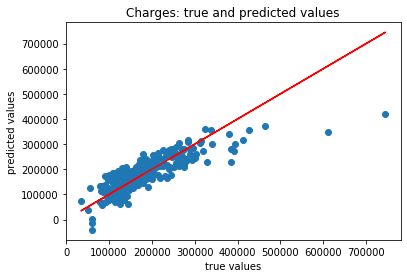

Mean absolute error of the prediction is: 31089.92151658728
Mean squared error of the prediction is: 2002319845.2647738
Root mean squared error of the prediction is: 44747.288691771864
Mean absolute percentage error of the prediction is: 19.16064180118958


In [31]:
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))



In [32]:
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

print("R-squared of the model in the training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

NameError: name 'lrm' is not defined

In [ ]:
#The scatter plot shows that the predicted values are not aligned with the
#true values, or the relationship is not linear. 
#My model is stable provided that the training and test r-squared values are very close

In [ ]:
#Ridge

In [33]:
from sklearn.linear_model import Ridge

# Fitting a ridge regression model. Alpha is the regularization
# parameter (usually called lambda). As alpha gets larger, parameter
# shrinkage grows more pronounced.
ridgeregr = Ridge(alpha=10) 
ridgeregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = ridgeregr.predict(X_train)
y_preds_test = ridgeregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(ridgeregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(ridgeregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))


R-squared of the model on the training set is: 0.7107565617827384
-----Test set statistics-----
R-squared of the model on the test set is: 0.7020143049560054
Mean absolute error of the prediction is: 31038.59131373257
Mean squared error of the prediction is: 2000587776.3223944
Root mean squared error of the prediction is: 44727.93060630454
Mean absolute percentage error of the prediction is: 19.119730422367862


In [ ]:
#lasso - has feature selection (absolute value)

In [34]:
from sklearn.linear_model import Lasso

lassoregr = Lasso(alpha=10) 
lassoregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lassoregr.predict(X_train)
y_preds_test = lassoregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(lassoregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(lassoregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))


R-squared of the model on the training set is: 0.7107719270711957
-----Test set statistics-----
R-squared of the model on the test set is: 0.7017778818560338
Mean absolute error of the prediction is: 31088.149331865417
Mean squared error of the prediction is: 2002175051.05306
Root mean squared error of the prediction is: 44745.670752074555
Mean absolute percentage error of the prediction is: 19.15907538807511


In [ ]:
#Elasticnet

In [35]:
from sklearn.linear_model import ElasticNet

elasticregr = ElasticNet(alpha=10, l1_ratio=0.5) 
elasticregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = elasticregr.predict(X_train)
y_preds_test = elasticregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(elasticregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(elasticregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))


R-squared of the model on the training set is: 0.5038259026849923
-----Test set statistics-----
R-squared of the model on the test set is: 0.5505032530022587
Mean absolute error of the prediction is: 38130.17529059806
Mean squared error of the prediction is: 3017788143.848969
Root mean squared error of the prediction is: 54934.39854816806
Mean absolute percentage error of the prediction is: 22.561982126020936


In [ ]:
# for corss validation use either for loop or gridsearch

In [36]:
house_df['yrsold'].describe()

count    1460.000000
mean     2007.815753
std         1.328095
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: yrsold, dtype: float64

In [63]:
unemployment_df = pd.read_csv('index.csv')
unemployment_df.head()

,Year,Month,Day,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate
0,1954,7,1,NaN,NaN,NaN,0.80,4.6,5.8,NaN
1,1954,8,1,NaN,NaN,NaN,1.22,NaN,6.0,NaN
2,1954,9,1,NaN,NaN,NaN,1.06,NaN,6.1,NaN
3,1954,10,1,NaN,NaN,NaN,0.85,8.0,5.7,NaN
4,1954,11,1,NaN,NaN,NaN,0.83,NaN,5.3,NaN


In [64]:
unemployment_df.columns

Index(['Year', 'Month', 'Day', 'Federal Funds Target Rate',
       'Federal Funds Upper Target', 'Federal Funds Lower Target',
       'Effective Federal Funds Rate', 'Real GDP (Percent Change)',
       'Unemployment Rate', 'Inflation Rate'],
      dtype='object')

In [65]:
unemployment_df['Unemployment Rate'].isna().sum()

152

In [66]:
unemployment_df.set_index("Unemployment Rate", inplace=True)
unemployment_df.head()

,Year,Month,Day,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Inflation Rate
Unemployment Rate,,,,,,,,,
5.8,1954,7,1,NaN,NaN,NaN,0.80,4.6,NaN
6.0,1954,8,1,NaN,NaN,NaN,1.22,NaN,NaN
6.1,1954,9,1,NaN,NaN,NaN,1.06,NaN,NaN
5.7,1954,10,1,NaN,NaN,NaN,0.85,8.0,NaN
5.3,1954,11,1,NaN,NaN,NaN,0.83,NaN,NaN


In [67]:
df_unemp=unemployment_df.loc[unemployment_df['Year'].isin(['2006','2007','2008','2009','2010'])]

In [40]:
df_unemp.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 74 entries, 4.7 to 9.3
Data columns (total 9 columns):
Year                            74 non-null int64
Month                           74 non-null int64
Day                             74 non-null int64
Federal Funds Target Rate       49 non-null float64
Federal Funds Upper Target      25 non-null float64
Federal Funds Lower Target      25 non-null float64
Effective Federal Funds Rate    60 non-null float64
Real GDP (Percent Change)       20 non-null float64
Inflation Rate                  60 non-null float64
dtypes: float64(6), int64(3)
memory usage: 5.8 KB


In [70]:
df_unemp['Real GDP (Percent Change)'].fillna(df_unemp['Real GDP (Percent Change)'].mean(), inplace=True)

In [72]:
df_unemp['Real GDP (Percent Change)']

Unemployment Rate
4.7     4.90
NaN     0.82
4.8     0.82
4.7     0.82
NaN     0.82
4.7     1.20
4.6     0.82
NaN     0.82
4.6     0.82
NaN     0.82
4.7     0.40
4.7     0.82
4.5     0.82
4.4     3.20
4.5     0.82
4.4     0.82
4.6     0.20
4.5     0.82
4.4     0.82
4.5     3.10
4.4     0.82
4.6     0.82
4.7     2.70
4.6     0.82
4.7     0.82
NaN     0.82
4.7     1.40
NaN     0.82
4.7     0.82
5.0     0.82
        ... 
6.5    -8.20
NaN     0.82
NaN     0.82
6.8     0.82
7.3     0.82
NaN     0.82
7.8    -5.40
8.3     0.82
8.7     0.82
9.0    -0.50
9.4     0.82
9.5     0.82
9.5     1.30
9.6     0.82
9.8     0.82
10.0    3.90
9.9     0.82
9.9     0.82
9.8     1.70
9.8     0.82
9.9     0.82
9.9     3.90
9.6     0.82
9.4     0.82
9.4     2.70
9.5     0.82
9.5     0.82
9.4     2.50
9.8     0.82
9.3     0.82
Name: Real GDP (Percent Change), Length: 74, dtype: float64

In [56]:
df_unemp['Real GDP (Percent Change)'].iloc[0:]

Unemployment Rate
4.7     4.90
NaN     0.82
4.8     0.82
4.7     0.82
NaN     0.82
4.7     1.20
4.6     0.82
NaN     0.82
4.6     0.82
NaN     0.82
4.7     0.40
4.7     0.82
4.5     0.82
4.4     3.20
4.5     0.82
4.4     0.82
4.6     0.20
4.5     0.82
4.4     0.82
4.5     3.10
4.4     0.82
4.6     0.82
4.7     2.70
4.6     0.82
4.7     0.82
NaN     0.82
4.7     1.40
NaN     0.82
4.7     0.82
5.0     0.82
        ... 
6.5    -8.20
NaN     0.82
NaN     0.82
6.8     0.82
7.3     0.82
NaN     0.82
7.8    -5.40
8.3     0.82
8.7     0.82
9.0    -0.50
9.4     0.82
9.5     0.82
9.5     1.30
9.6     0.82
9.8     0.82
10.0    3.90
9.9     0.82
9.9     0.82
9.8     1.70
9.8     0.82
9.9     0.82
9.9     3.90
9.6     0.82
9.4     0.82
9.4     2.70
9.5     0.82
9.5     0.82
9.4     2.50
9.8     0.82
9.3     0.82
Name: Real GDP (Percent Change), Length: 74, dtype: float64

In [43]:
df_unemp.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 74 entries, 4.7 to 9.3
Data columns (total 9 columns):
Year                            74 non-null int64
Month                           74 non-null int64
Day                             74 non-null int64
Federal Funds Target Rate       49 non-null float64
Federal Funds Upper Target      25 non-null float64
Federal Funds Lower Target      25 non-null float64
Effective Federal Funds Rate    60 non-null float64
Real GDP (Percent Change)       74 non-null float64
Inflation Rate                  60 non-null float64
dtypes: float64(6), int64(3)
memory usage: 5.8 KB


In [46]:
pd.concat([house_df,df_unemp['Real GDP (Percent Change)']], ignore_index=True, axis=1)
#error occurs because of the dimensions 

ValueError: Shape of passed values is (1699, 103), indices imply (1529, 103)